# Deformation of the Lithosphere, Isostasy and Subsidence Calculations


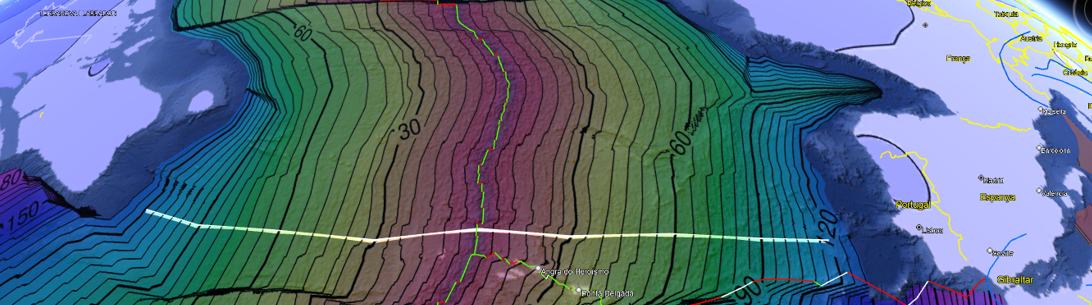

#### Modules. Functions and Initial Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, Layout
from ipywidgets import interact, FloatSlider

style = {'description_width': 'initial'}

def subside(hC,hM,BC,BM, fill): 
    '''
    This function calculates the Subsidence (S) from initial thickness of crustal thickness(hC) and mantle thickness(hM),
    their stretching factors (BC, BM) and densities (d_crust, d_mantle, d_ast)
    It considers the different type of filling (water, sediment or air)
    '''
    d_crust = density_crust.value  #kg/m3
    d_mantle = density_mantle.value  # lithospheric mantle density
    d_ast = density_ast.value
    d_water = density_water.value
    d_sed = density_sed.value
    d_air =density_air.value
    if fill == 'water':
        d_fill = d_water
    if fill== 'sediment':
        d_fill = d_sed
    if fill == 'air':
        d_fill = d_air
    d_w = 1000
    S = (hC*(d_ast - d_crust)*(1-1/BC) + hM*(d_ast - d_mantle)*(1-1/BM))/(d_ast - d_fill)
    return S
    

#initial parameters
d_crust = 2850  #kg/m3
d_mantle = 3300  # lithospheric mantle density at 0ºC
d_ast = 3250
d_water = 1000
d_sed = 2000
d_air = 0
Ta = 1330    #temperature of the top astenosphere
T_expansion = 2.4E-5   #coeff thermal expansion ºC-1
Young = 0.7e11  # Young's modulus Pa (= N/m**2)
Poisson = 0.25 # Poisson's ratio
gravity = 10 # m/s**2

#### Setting density values

In [2]:
density_crust = widgets.BoundedFloatText(
    value= d_crust,
    max = 3000,
    step=50,
    description='density crust (kg/m3):',
    disabled=False,
    style = style)
density_mantle = widgets.BoundedFloatText(
    value= d_mantle,
    max = 4000,
    step=50,
    description='density mantle:',
    disabled=False,
    style = style)
density_ast = widgets.BoundedFloatText(
    value= d_ast,
    max = 4000,
    step=50,
    description='density astenosphere:',
    disabled=False,
    style = style)
density_sed = widgets.BoundedFloatText(
    value= d_sed,
    max = 4000,
    step=50,
    description='density sediments:',
    disabled=False,
    style = style)
density_water = widgets.BoundedFloatText(
    value= d_water,
    max = 4000,
    step=50,
    description='density water:',
    disabled=False,
    style = style)
density_air = widgets.BoundedFloatText(
    value= d_air,
    max = 4000,
    step=50,
    description='density air:',
    disabled=False,
    style = style)
density_box1 = widgets.VBox([density_crust, density_mantle,density_ast])
density_box2 = widgets.VBox([density_air,density_water,density_sed])
density_box = widgets.HBox([density_box1,density_box2])
density_box

### Ocean basins: Heat flow, water depth and Lithospheric thickness
The earth loses most of its internal heat in the vicinity of the mid-ocean ridges (MORs) where new oceanic lithosphere is created. Elsewhere the lithosphere forms a well insulating layer and a relatively small amount of heat is lost.

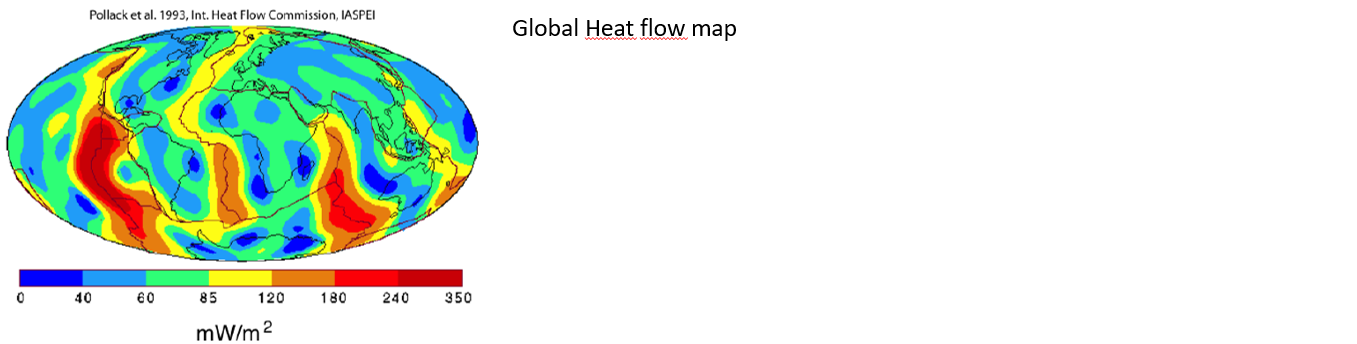

As oceanic lithosphere cools, the thickness of the subcrustal lithospheric mantle increases. This causes deeper bathymetry of the ocean basins. An isostatic balance alllows for prediction of the lithospheric thickness based on the bathymetry of the basin floor

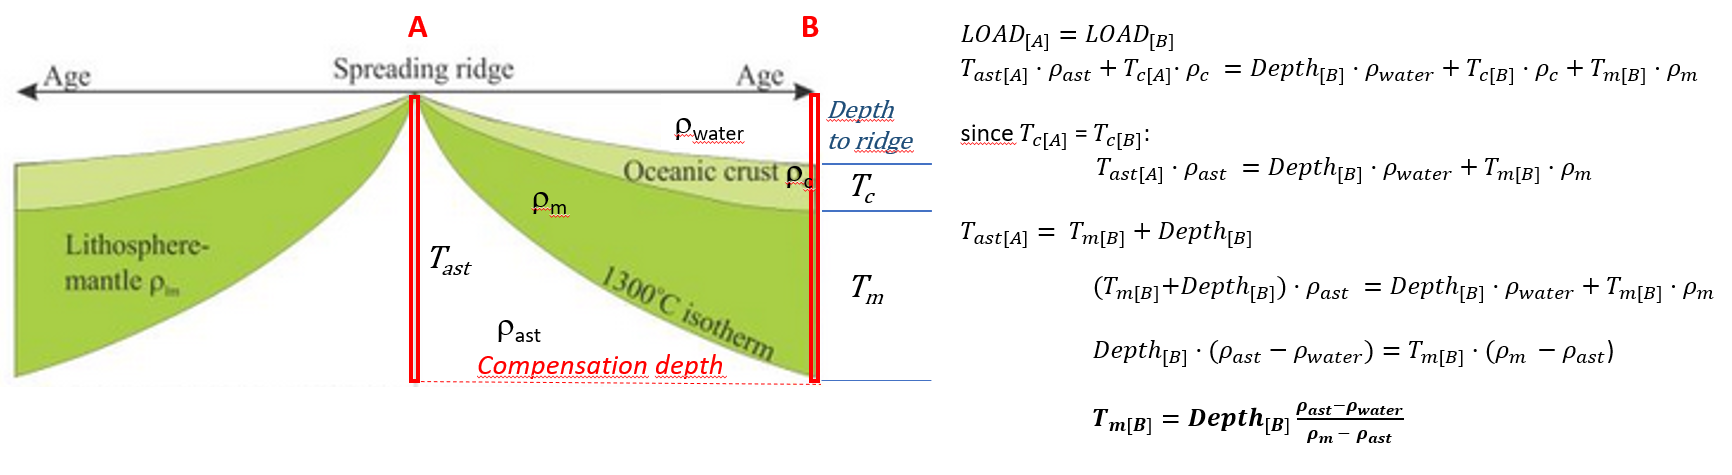

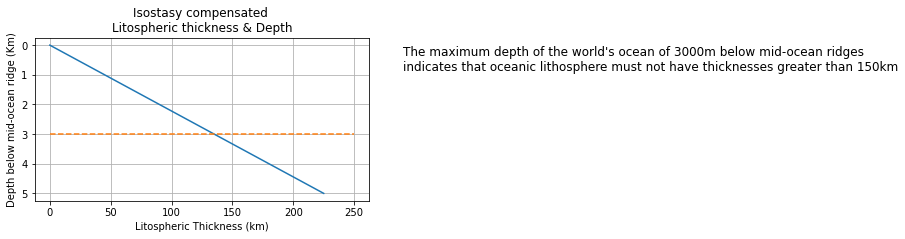

In [3]:
#Calculation of the thickness and depth of the oceanic lithosphere

Depth = np.linspace(0, 5, 100)  # depth below mid-ocean ridge in km
Age = np.linspace(0, 120, 100)  #Age in Ma
T_crust = 0  # thickness of the oceanic crust
T_mantle = Depth*(density_ast.value-density_water.value)/(density_mantle.value-density_ast.value)
T_lit = T_mantle + T_crust

plt.figure(figsize=(6,3))
plt.plot(T_lit,Depth)
plt.title("Isostasy compensated \nLitospheric thickness & Depth")
plt.xlabel("Litospheric Thickness (km)")
plt.ylabel("Depth below mid-ocean ridge (Km)")
plt.gca().invert_yaxis()
plt.grid()

textstr ="\
The maximum depth of the world's ocean of 3000m below mid-ocean ridges \n\
indicates that oceanic lithosphere must not have thicknesses greater than 150km"
# place a text box in upper left in axes coords
plt.annotate(textstr, fontsize=12, xy=(1.1, 0.95), xycoords='axes fraction', verticalalignment='top')
plt.plot([0,250],[3,3],linestyle = '--')

plt.show()

### Lithospheric Thickness and Age
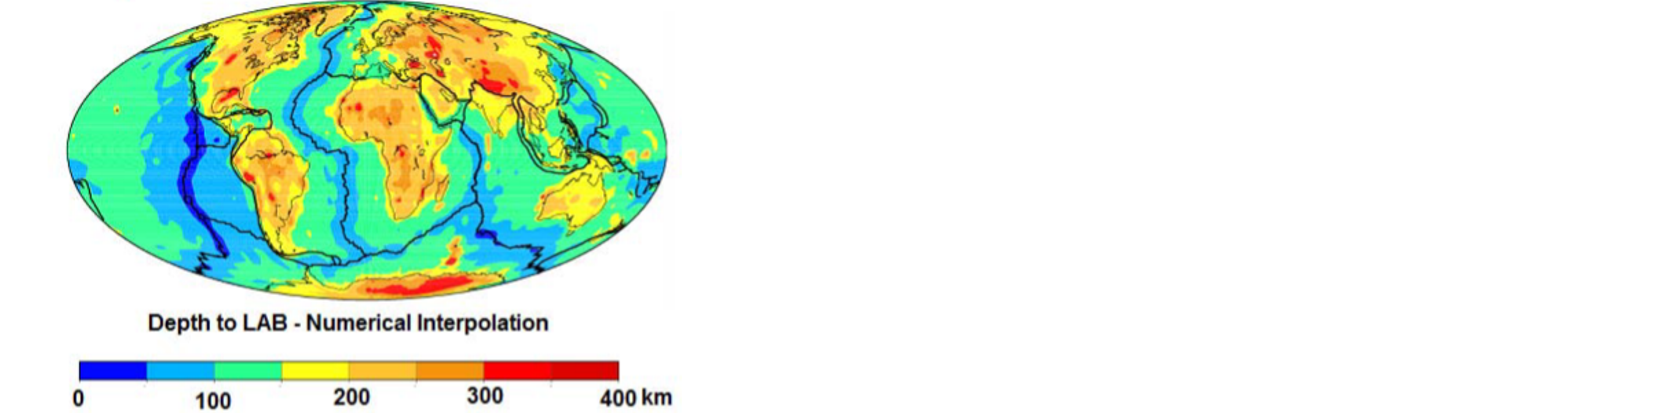

Using isostatic compensation, we can calculate the Thickness of the Lithosphere from empirical observation of the ocean's floor depth:

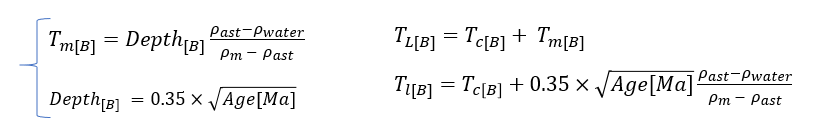

Or, using the same principles we can calculate the Depth of the ocean's floor from empirical observation of its thickness:
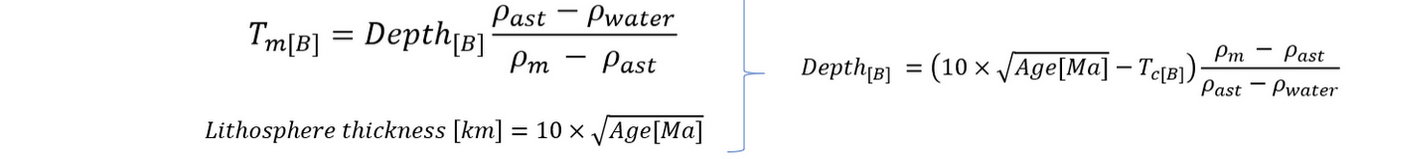

### Lets plot the above equations:

In [4]:
#interactive plot
def interactive_plot(den_mantle, den_ast, den_water):
    Depth_age_empirical = 0.35*np.sqrt(Age) # Depth of the oceanic floor as a function of Age (empirical law)
    T_lit_age_derived = T_crust + Depth_age_empirical*(den_ast - den_water)/(den_mantle - den_ast)

    T_lit_age_empirical = 10*np.sqrt(Age)   #Lithospheric thickness as a function of Age (empirical law)
    Depth_age_derived = (T_lit_age_empirical-T_crust)*(den_mantle - den_ast)/(den_ast - den_water)


    fig = plt.figure(figsize=(7, 5))

    ax1 = fig.add_subplot(2,1,2)
    ax1.plot(Age,T_lit_age_derived, linestyle = '--')
    ax1.plot(Age,T_lit_age_empirical)

    ax1.fill_between(Age,T_lit_age_empirical, color = 'b', alpha = 0.15)
    ax1.set_ylim(bottom=0)
    plt.gca().invert_yaxis()
    plt.xlabel("Age (Ma)")
    plt.ylabel("Lithospheric Thickness (km)")
    plt.grid()


    ax2 = fig.add_subplot(2,1,1)
    ax2.plot(Age,Depth_age_derived, linestyle = '--', label = 'derived from isostasy calculations')
    ax2.plot(Age,Depth_age_empirical, label = 'empirical')
    ax2.fill_between(Age,Depth_age_empirical, Depth_age_empirical.max(), color = 'b', alpha = 0.15)

    ax2.set_ylim(bottom=0)

    plt.gca().invert_yaxis()
    plt.title("Lithospheric thickness and depth")
    plt.ylabel("Depth below MOR (km)")
    plt.legend()
    plt.grid()

    textstr ="\
    With thickening of the purely conductive Lithosphere, \n\
    less and less asthenosphere freezes and adheres until \n\
    the Lithosphere has reached a thickness (today ca. 110 km) \n\
    in which only just enough heat can flow through the lithosphere \n\
    (by means of heat conduction) as introduced by the mantle \n\
    to the bottom of the lithosphere. \n\
    From this time extra energy released by freezing of asthenosphere \n\
    can no longer be removed and the thickness of the lithosphere remains stable.\n\
    \n\
    Change values of density and find the match between calculations with observations"

    # place a text box in upper left in axes coords
    plt.annotate(textstr, fontsize=12, xy=(1.1, 0.95), xycoords='axes fraction', verticalalignment='top')
    plt.show()

# Create sliders for density of the mantle and astenosphere
Style = {'description_width': '250px'}
Layout = widgets.Layout(width = '700px')
interact(interactive_plot,
         den_mantle = FloatSlider(value=d_mantle, min= d_mantle-100 , max=d_mantle+100, step=1, description='Lithospheric Mantle density', style = Style, layout = Layout ),
         den_ast = FloatSlider(value=d_ast, min= d_ast-100 , max=d_ast+100, step=1, description='Astenosphere density (kg/m3)', style = Style, layout = Layout),
         den_water = FloatSlider(value=d_water, min= d_water-100 , max=d_water+100, step=1, description='Ocean Water density (kg/m3)', style = Style, layout = Layout))


interactive(children=(FloatSlider(value=3300.0, description='Lithospheric Mantle density', layout=Layout(width…

<function __main__.interactive_plot(den_mantle, den_ast, den_water)>

## Stretching Factor

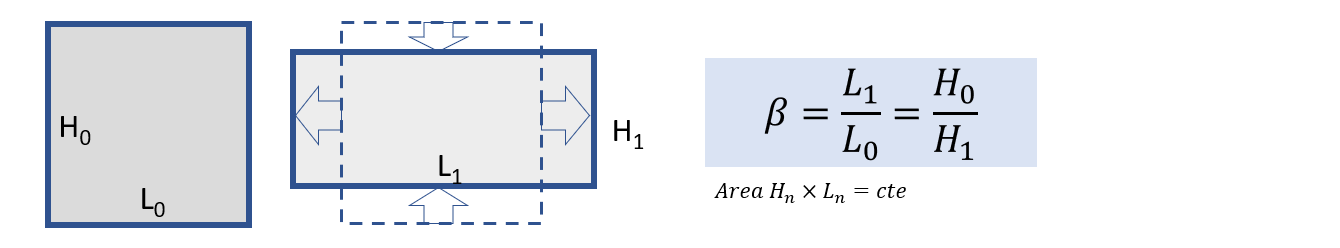

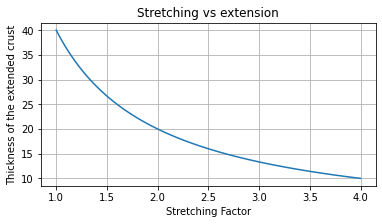

In [5]:
H0 = 40
SFactor = np.linspace(1, 4,100)
Hs = H0/SFactor

plt.figure(figsize=(6,3))
plt.plot(SFactor,Hs)
plt.title("Stretching vs extension")
plt.ylabel("Thickness of the extended crust")
plt.xlabel("Stretching Factor")
plt.grid()



## Lithospheric extension and Subsidence

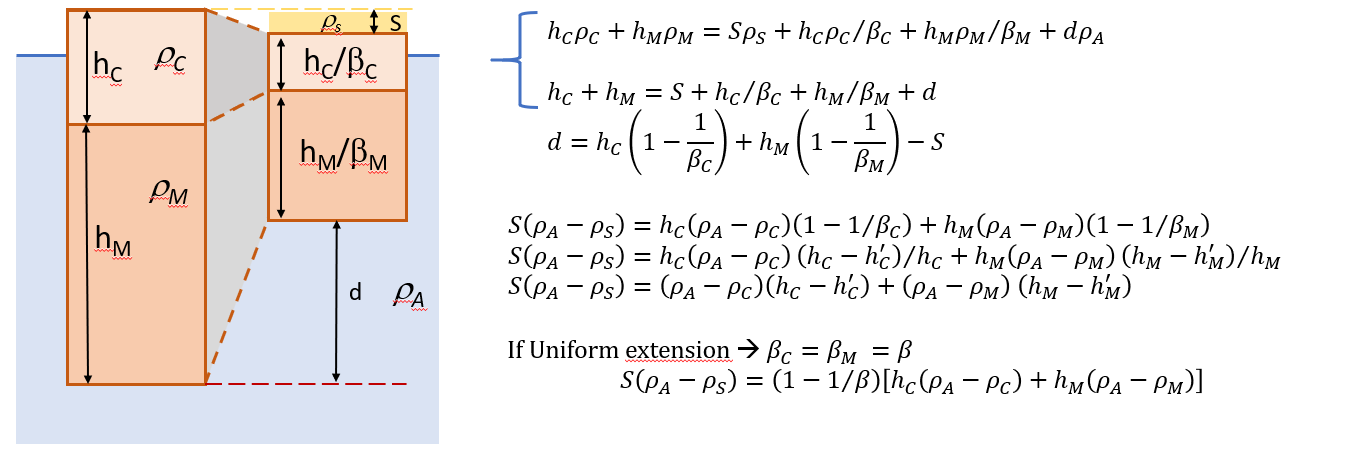

## Subsidence caused by Lithosphere Stretching
Here Subsidence is calculated for a given initial thickness of the Lithosphere and subsequent stretching conditions and sediment filling.

In [6]:
stretching_data = widgets.RadioButtons(
    options=['Stretched Thickness', 'Stretching Factor'],
    description='choose:',
    value = 'Stretching Factor',
    disabled=False,
    style = style)
stretching_data

RadioButtons(description='choose:', index=1, options=('Stretched Thickness', 'Stretching Factor'), style=Descr…

In [7]:
# Set Crustal and mantle Thickness and Stretching factor

Hc = widgets.BoundedFloatText(
    value= 40,
    step=1,
    description='Initial Crustal Thickness (km):',
    disabled=False,
    style = style)
Hcs = widgets.BoundedFloatText(
    value=40,
    step=1,
    description="Stretched Crustal Thickness(km):",
    disabled=False,
    style = style)
Hm = widgets.BoundedFloatText(
    value=80,
    step=1,
    description='Initial Mantle Thickness (km):',
    disabled=False,
    style = style)
Hms = widgets.BoundedFloatText(
    value= 80,
    step=1,
    description="Stretched Mantle Thickness(km):",
    disabled=False,
    style = style)
Bfactor_C = widgets.BoundedFloatText(
    value = False,
    min=1,
    max= 10,
    step=0.1,
    description='Crustal Stretching Factor:',
    layout={'width': 'max-content'}, # If the items' names are long
    disabled=False,
    style = style)
Bfactor_M = widgets.BoundedFloatText(
    value = 0,
    min=1,
    max=10.0,
    step=0.1,
    description='Mantle Stretching Factor:',
    layout={'width': 'max-content'}, # If the items' names are long
    disabled=False,
    style = style)
fill = widgets.RadioButtons(
    options=['sediment', 'water','air'],
    description='basin fill:',
    value = 'sediment',
    disabled=False,
    style = style)
box1 = widgets.HBox([Hc, Hm])
box_A = widgets.HBox([Hcs, Hms])
box_B = widgets.HBox([Bfactor_C, Bfactor_M])
box3 = widgets.HBox([fill, density_box])
if stretching_data.value == 'Stretched Thickness':
    box2 = box_A
else:
    box2 = box_B
display(box1, box2, box3)

In [8]:
#Subsidence Calculation
hC = Hc.value
hM = Hm.value
if stretching_data.value == 'Stretched Thickness':
    BC = hC/Hcs.value
    BM = hM/Hms.value
else:
    BC = Bfactor_C.value
    BM = Bfactor_M.value
    
S = subside(hC,hM,BC,BM, fill = fill.value)

print('The subsidence is {0:0<3} km'.format(round(float(S),2)))

The subsidence is 0.0 km


### Initial Subsidence as a function of crust/lithosphere thickness ratio and uniform stretching factor.

Take a fixed initial Lithospheric thickness of 150km.

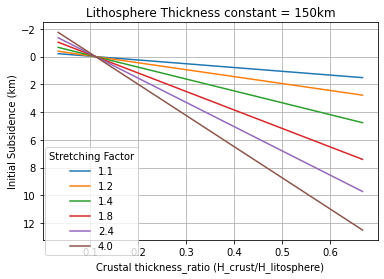

In [9]:
#Uniform extension
#sediment filled

hC = np.linspace(5, 100,100)
hM = 150-hC
thickness_ratio = hC/(hC+hM)

# uniform stretching
BC = [1.1, 1.2, 1.4, 1.8, 2.4, 4.0]
BM = BC

for n in range(len(BC)):
    S = subside(hC,hM,BC[n],BM[n], fill = 'water')
    plt.plot(thickness_ratio,S, label = BC[n])

plt.title("Lithosphere Thickness constant = 150km")
plt.legend(title='Stretching Factor',  loc = 'best', bbox_to_anchor=(0.3, 0.45))
plt.xlabel("Crustal thickness_ratio (H_crust/H_litosphere)")
plt.ylabel("Initial Subsidence (km)")

plt.grid()
plt.gca().invert_yaxis()

### Initial Subsidence as a function of stretching factor.

Take a fixed initial Lithospheric thickness of 150km and uniform extension

In [10]:
# Choose the basin filled with water, sediments or air
fill

RadioButtons(description='basin fill:', options=('sediment', 'water', 'air'), style=DescriptionStyle(descripti…

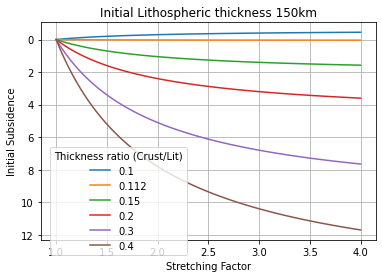

In [11]:
#Uniform stretching and Constant Lithospheric thickness

#stretching factors
BC = np.linspace(1, 4,100)  #Crust stretching ratio
BM = BC
# Initial thickness
#thickness_ratio = hC/(hC+hM)
hL = 150  #Constant Initial thickness of the lithosphere
thickness_ratio = [0.1, 0.112, 0.15, 0.2, 0.3, 0.4]
# Calculate subsidence
for n in range(len(thickness_ratio)):
    hC = thickness_ratio[n]*hL
    hCs = hC/BC
    hM = hL-hC
    S = subside(hC,hM,BC,BM, fill = fill.value)
    plt.plot(BC,S, label = round(thickness_ratio[n],3))
plt.title("Initial Lithospheric thickness 150km")
plt.legend(title='Thickness ratio (Crust/Lit)',  loc = 'best', bbox_to_anchor=(0.45,0.45))
plt.xlabel("Stretching Factor")
plt.ylabel("Initial Subsidence")

plt.grid()
plt.gca().invert_yaxis()

### Initial Subsidence as a function of stretching factor and non-uniform extension
Assume initial thickness of 150km and mantle extension 3 times larger than the crustal extension

In [12]:
fill

RadioButtons(description='basin fill:', options=('sediment', 'water', 'air'), style=DescriptionStyle(descripti…

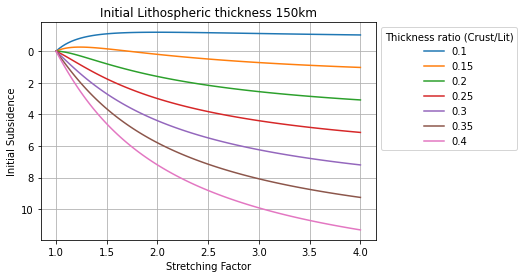

In [13]:
#water filled
#non-uniform stretching
#Constant Lithospheric thickness

#stretching factors
BC = np.linspace(1, 4,100)
BM = BC + (BC- 1)*1
# Initial thickness
thickness_ratio = hC/(hC+hM)
hL = 150  #Constant Initial thickness of the lithosphere
thickness_ratio = np.linspace(0.1, 0.4, 7)

# Calculate subsidence
for n in range(len(thickness_ratio)):
    hC = thickness_ratio[n]*hL
    hM = hL-hC
    S = subside(hC,hM,BC,BM, fill = fill.value)
    plt.plot(BC,S, label = round(thickness_ratio[n],2))
plt.title("Initial Lithospheric thickness 150km")
plt.legend(title='Thickness ratio (Crust/Lit)',  loc = 'best', bbox_to_anchor=(1, 1))
plt.xlabel("Stretching Factor")
plt.ylabel("Initial Subsidence")

plt.grid()
plt.gca().invert_yaxis()

# Flexure

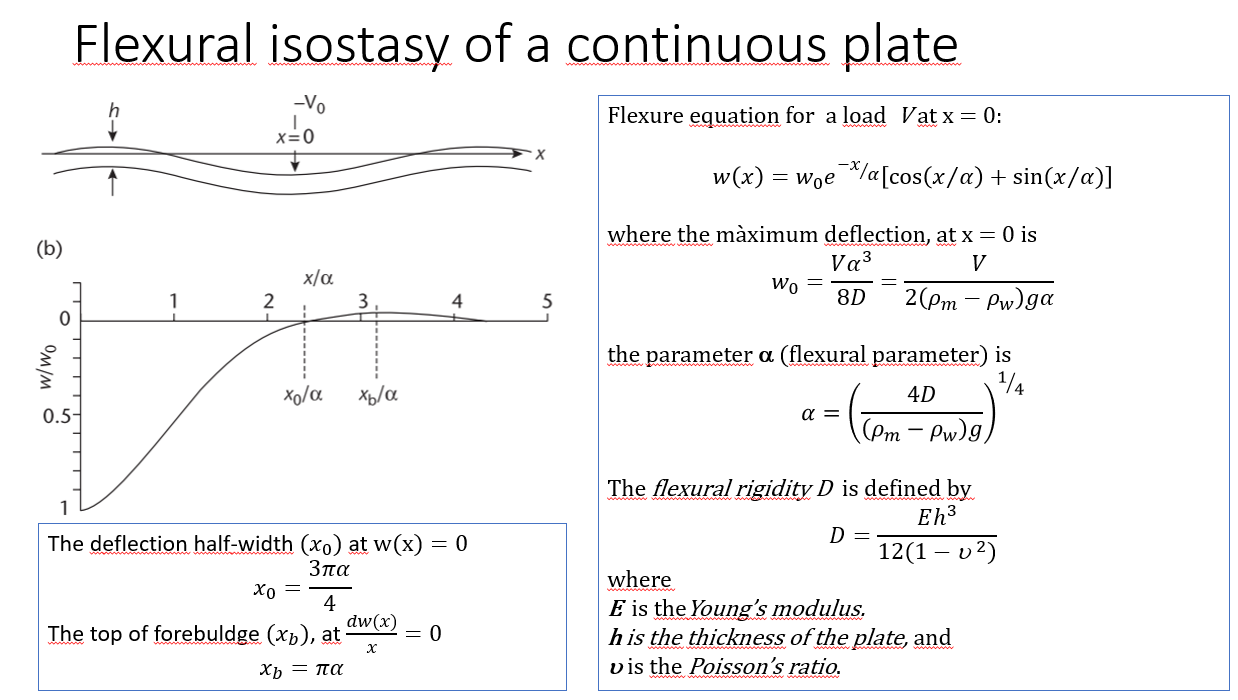

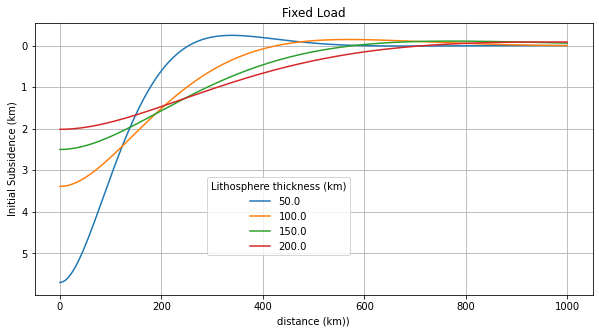

In [14]:
V = 28270644072000                 # The vertical Force applied at x=0 that drives flexure
HL = np.linspace(50000,200000,4)   # The Thickness of the plate ranging from 50km to 200km

plt.figure(figsize= (10,5))
plt.title("Fixed Load")

for n in range(len(HL)):
    #Flexural rigity
    D = (Young*(HL[n]**3))/(12*(1-Poisson**2))         #flexural rigidity
    alfa = ((4*D)/((d_mantle-d_water)*gravity))**0.25
    w0 = V*alfa**3/(8*D)                               # The maximum deflection at x = 0 
    x = np.linspace(0,1000000,200)
    w = w0*(np.e**(-x/alfa))*(np.cos(x/alfa)+np.sin(x/alfa))
    plt.plot(x/1000,w/1000,label = HL[n]/1000)
plt.gca().invert_yaxis()
plt.legend(title='Lithosphere thickness (km)',  loc = 'best', bbox_to_anchor=(0.3, 0.45))
plt.xlabel("distance (km))")
plt.ylabel("Initial Subsidence (km)")

plt.grid()


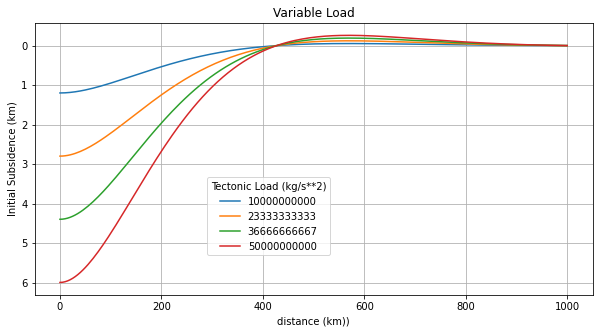

In [15]:
V = np.linspace(10000000000000,50000000000000,4)             # The vertical Force applied at x=0 that drives flexure
HL = 100000   # The Thickness of the plate in meters

plt.figure(figsize= (10,5))
plt.title("Variable Load")

for n in range(len(V)):
    D = (Young*(HL**3))/(12*(1-Poisson**2))         #flexural rigidity
    alfa = ((4*D)/((d_mantle-d_water)*gravity))**0.25
    w0 = V[n]*alfa**3/(8*D)                               # The maximum deflection at x = 0 
    x = np.linspace(0,1000000,200)
    w = w0*(np.e**(-x/alfa))*(np.cos(x/alfa)+np.sin(x/alfa))
    plt.plot(x/1000,w/1000,label = round(V[n]/1000))
plt.gca().invert_yaxis()
plt.legend(title='Tectonic Load (kg/s**2)',  loc = 'best', bbox_to_anchor=(0.3, 0.45))
plt.xlabel("distance (km))")
plt.ylabel("Initial Subsidence (km)")

plt.grid()

### Interactive plot

In [16]:
# Define the function to plot
def interactive_plot(HL, V):
    D = (Young*((1000*HL)**3))/(12*(1-Poisson**2))         #flexural rigidity
    alfa = ((4*D)/((d_mantle-d_water)*gravity))**0.25
    w0 = 1e9*V*alfa**3/(8*D)                               # The maximum deflection at x = 0 
    x = np.linspace(0,2000000,200000)
    w = w0*(np.e**(-x/alfa))*(np.cos(x/alfa)+np.sin(x/alfa))
    plt.figure(figsize=(10, 4))
    plt.title("Variable Load and elastic thickness")
    plt.plot(x/1000,w/1000,label = (round(V),HL))
    plt.fill_between(x/1000,w/1000, alpha = 0.3)
    plt.xlim(0, 2000)
    plt.ylim(-1, 10)

    plt.gca().invert_yaxis()
    plt.legend(title='Tectonic Load (1E9kg/s**2) / Elastic Thickness ( km)',  loc = 'best', bbox_to_anchor=(1, 0.45))
    plt.xlabel("distance (km))")
    plt.ylabel("Initial Subsidence (km)")
    plt.grid()
    plt.show()

# Create sliders for HL (Lithospheric thickness) and V (vertical load)
Style = {'description_width': '150px'}
Layout = widgets.Layout(width = '500px')
interact(interactive_plot,
         HL = FloatSlider(value=100, min= 1, max=250, step=10, description='Elastic Thickness(km)', style = Style, layout = Layout ),
         V = FloatSlider(value=30000, min=0, max=50000, step=1000, description='Vertical load(1E6kg/s**2)', style = Style, layout = Layout))



interactive(children=(FloatSlider(value=100.0, description='Elastic Thickness(km)', layout=Layout(width='500px…

<function __main__.interactive_plot(HL, V)>

# EXERCISES

### EXERCISE 1:
A region of continental lithosphere undergoes crustal extension only. The normal crustal thickness in the regions is 40km. Calculate the thickness of the stretched crust and the corresponding stretching factor needed to produce subsidence and sedimentary fill of 10km of sediments. Consider that the basin is overfilled, density of the crust 2700kg/m3, density of the asthenosphere 3200kg/m3, density of sediments 2000kg/m3


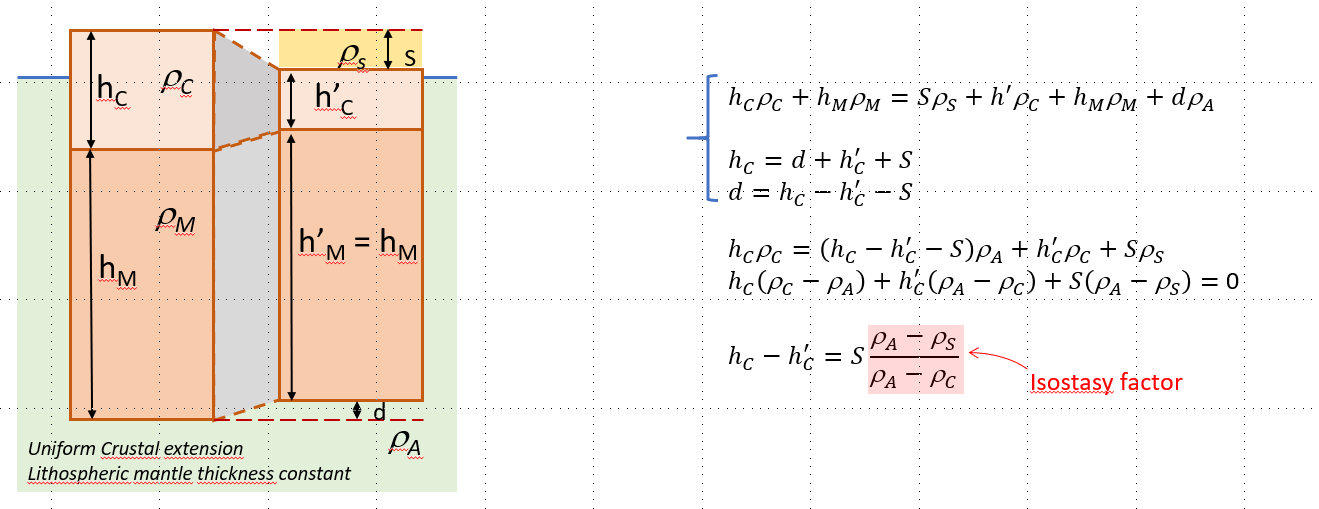

In [17]:
density_box

In [18]:
d_crust = density_crust.value
d_ast = density_ast.value
d_sed = density_sed.value
h_crust = 40
S = 12
h_crust_s = h_crust -S*(d_ast-d_sed)/(d_ast-d_crust)
Beta_factor = h_crust/h_crust_s
print('The thickness of the stretched crust is {0} km and the Beta-factor is {1}'.format(h_crust_s, Beta_factor))

The thickness of the stretched crust is 2.5 km and the Beta-factor is 16.0


### EXERCISE 2
A lithospheric plate made of 40km of crust and 80km of subcrustal mantle undergoes uniform extension with a stretching factor of 2.

A) Calculate the initial (tectonic) subsidence if the basin is filled with sediments.

B) Calculate subsidence if the stretching factor of the mantle is 4.

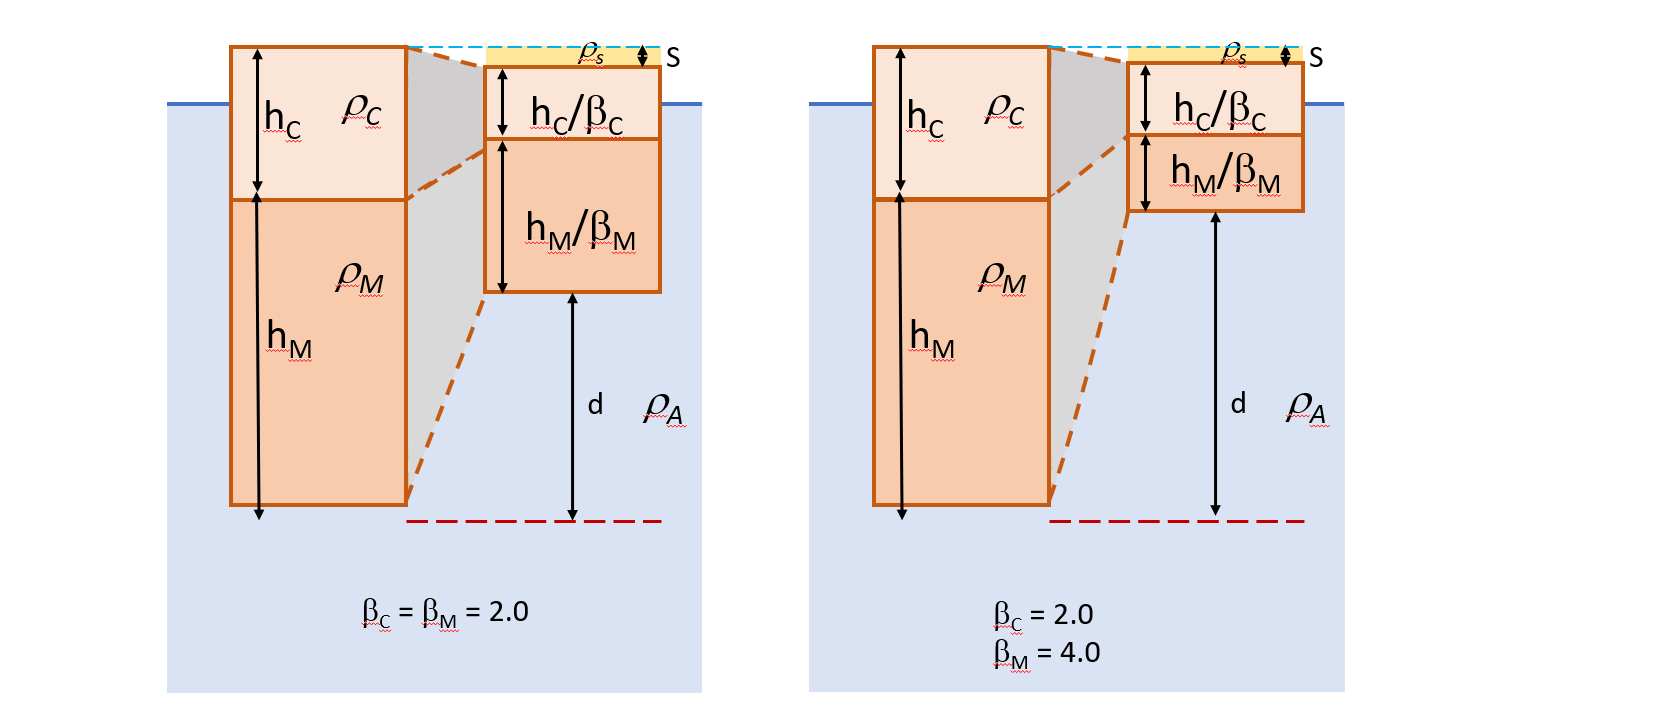

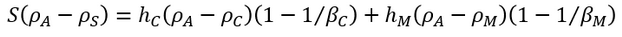

In [19]:
density_box

In [20]:
hC = 40
hM = 80
BC = 2
BM = 2
S = subside(hC,hM,BC,BM, fill = 'sediment')
print('The subsidence for uniform stretching = 2 is {0:0<3} km'.format(round(float(S),2)))

The subsidence for uniform stretching = 2 is 4.8 km


In [21]:
hC = 40
hM = 80
BC = 2
BM = 4
S = subside(hC,hM,BC,BM, fill = 'sediment')
print('The subsidence for mantle stretching factor = 4 is {0:0<3} km'.format(round(float(S),2)))                                                                    

The subsidence for mantle stretching factor = 4 is 4.0 km


### EXERCISE 3:
An ocean basin floor has a depth of 4.5km. If it is filled with sediments up to sea level, what is the thickness of the sedimentary fill?

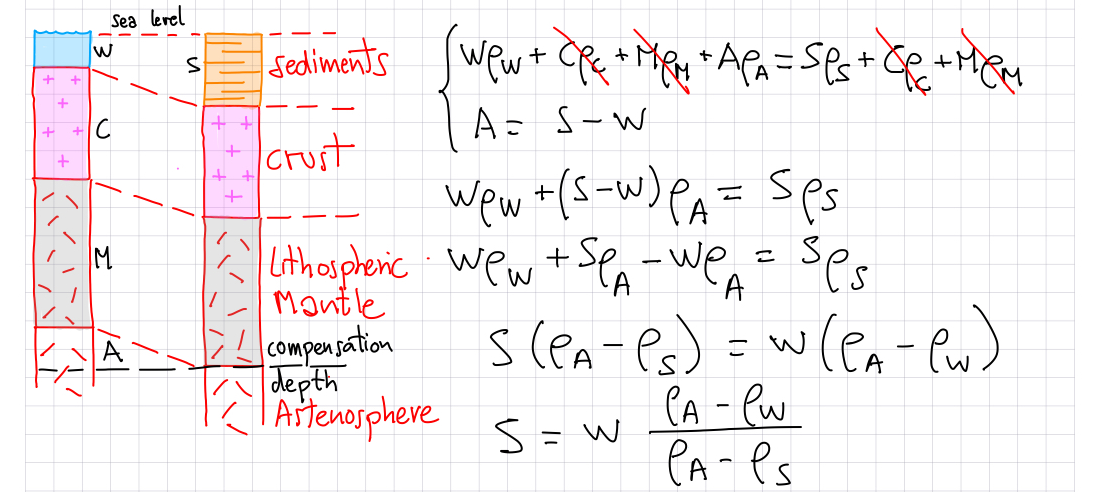

In [22]:
widgets.VBox([density_water, density_sed, density_ast])

In [23]:
W = 4500
dA = density_mantle.value
dw = density_water.value
ds = density_sed.value


S = W*(dA-dw)/(dA-ds)
print('The maximum thickness of sediments is {0} meters'.format(round(S)))

The maximum thickness of sediments is 7962 meters


### EXERCISE 4:
Given a lithospheric thickness of 150km, calculate the hoizontal distance from maximum deflection to the top of the forebuldge and the maximum height of the forebuldge if the maximum deflection is 5000 meters.

In [24]:
# given a lithospheric thickness of 150km, calculate the distance to the top of the forebuldge and the height
HL = 150000
D = (Young*(HL**3))/(12*(1-Poisson**2))  #flexural rigidity
alfa = ((4*D)/((d_mantle-d_water)*gravity))**0.25     
Xfb = np.pi*alfa

#height of the forebulge given a maximum deflection of 5000m
w0 = 5000 #maximum deflection
Xfb_height = np.e**(-np.pi)*w0

print('The distance to the top of the forebuldge is {0:0<3} km and the height is {1} meters'.
      format(round(Xfb/1000),round(Xfb_height)))

The distance to the top of the forebuldge is 772 km and the height is 216 meters


### EXERCISE 5
Given a flexure on a continuous plate with a half-width of 150km calculate the elastic thickness of the lithosphere.

##### Solution:
1. Given x0 = 150 km, calculate the flexural parameter alfa:
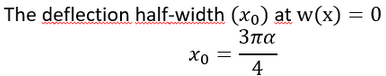

2. Calculate flexural rigidity (D) from:
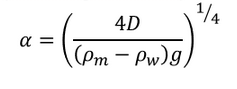

3. Calculate Elastic Thickness (E) from:
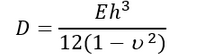

In [25]:
x0 = 150000
dm = density_mantle.value
dw = density_water.value
ds = density_sed.value

alfa = x0*4/(3*np.pi)
alfa
D = alfa**4*(dm-dw)*gravity/4

h = (D*12*(1-Poisson**2)/Young)**(1/3)

print('The flexural parameter alfa: {0} km,\
      flexural rigidity D: {1} Nm,\
      Elastic Thickness h: {2} km'.format(round(alfa/1000), D, round(h/1000)))

The flexural parameter alfa: 64 km,      flexural rigidity D: 9.444703674309591e+22 Nm,      Elastic Thickness h: 25 km
